In [44]:
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
df = pd.read_csv("data\\shoe_sales.csv")
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [46]:
df.shape

(60, 3)

In [47]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [48]:
df[df["sold_qty"] < 12.25].shape

(15, 3)

In [49]:
df[df["sold_qty"] > 19.75]
#outlier detection

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0
10,9/6/2023,Nike,23.0
16,9/9/2023,Nike,25.0
20,9/11/2023,Nike,23.0
23,9/12/2023,Adidas,689.0
26,9/14/2023,Nike,22.0
30,9/16/2023,Nike,21.0


### (1) Nike Analysis

In [50]:
df[df["brand"] == "Nike"].head(), df[df["brand"] == "Nike"].shape

(       date brand  sold_qty
 0  9/1/2023  Nike      24.0
 2  9/2/2023  Nike      21.0
 4  9/3/2023  Nike      18.0
 6  9/4/2023  Nike      22.0
 8  9/5/2023  Nike      20.0,
 (30, 3))

In [51]:
df_nike = df[df["brand"] == "Nike"]
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


#### (a) Null Values

In [52]:
df_nike[df_nike["sold_qty"].isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [53]:
med_value_nike = round(df_nike["sold_qty"].median())

In [54]:
df_nike["sold_qty"].fillna(med_value_nike, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_18088\725939764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nike["sold_qty"].fillna(med_value_nike, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\725939764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike["sold_qty"].fillna(med_value_nike, inplace=True)


In [55]:
df_nike.loc[[32,48]]

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


In [56]:
df_nike["sold_qty"].sum()

590.0

### (2) Adidas

In [57]:
df_adidas = df[df["brand"] == 'Adidas']
df_adidas.shape

(30, 3)

In [58]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [59]:
med_ad = round(df_adidas["sold_qty"].median())

In [60]:
df_adidas["sold_qty"].quantile(0.9)

17.1

In [61]:
df_adidas["sold_qty"].sum()

1044.0

In [62]:
df_adidas[df_adidas["sold_qty"] > df_adidas["sold_qty"].quantile(0.95)]

,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


In [63]:
df_nike = df[df["brand"] == "Nike"].copy()
df_nike["sold_qty"] = df_nike["sold_qty"].fillna(med_value_nike)
df_adidas = df[df["brand"] == "Adidas"].copy()
q95 = df_adidas["sold_qty"].quantile(0.95)

df_adidas["sold_qty"] = df_adidas["sold_qty"].clip(upper=q95)



In [64]:
df_nike["date"] = pd.to_datetime(df_nike["date"])
df_adidas["date"] = pd.to_datetime(df_adidas["date"])

df_nike = df_nike.sort_values("date")
df_adidas = df_adidas.sort_values("date")


In [65]:
def plot_qty():
    plt.figure(figsize=(15,6))

    plt.plot(df_nike["date"], df_nike["sold_qty"],
             label="Nike", color="blue")

    plt.plot(df_adidas["date"], df_adidas["sold_qty"],
             label="Adidas", color="red")

    plt.xlabel("Date")
    plt.ylabel("Sold Qty")
    plt.legend()
    plt.tight_layout()
    plt.show()


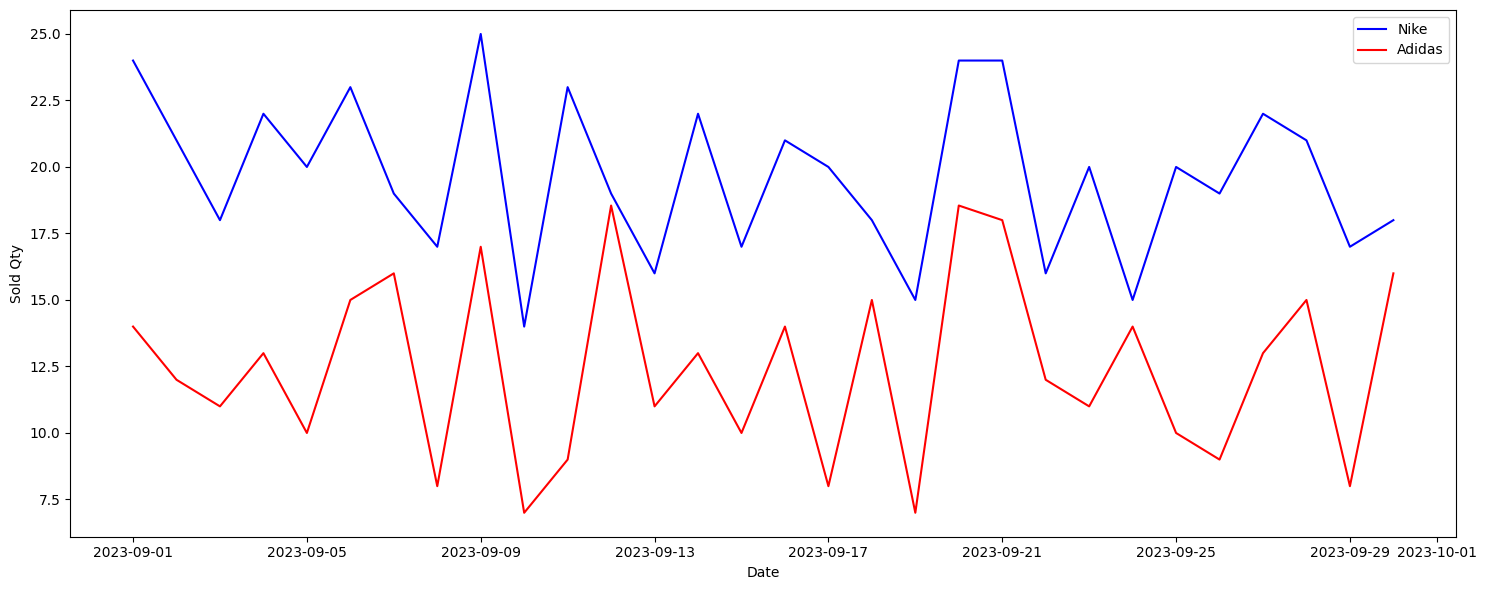

In [66]:
plot_qty()